In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('FA23.csv')
df

,No.,Computer_Project,Assignment,Quiz,Final
0,1,2.5,8.4,4.8,5.2
1,2,10.0,9.2,7.3,5.8
2,3,10.0,7.7,5.2,6.2
3,4,6.5,7.4,4.1,4.2
4,5,1.0,6.4,5.6,2.8
...,...,...,...,...,...
294,295,4.0,7.3,7.0,4.6
295,296,5.0,9.1,7.3,4.6
296,297,1.0,9.3,5.3,2.8
297,298,9.0,9.8,6.0,6.6


In [3]:
df.describe()

,No.,Computer_Project,Assignment,Quiz,Final
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,150.000000,7.120067,8.390635,6.411037,4.451505
std,86.458082,2.792956,2.240321,1.838581,2.047135
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,6.000000,7.700000,5.800000,3.600000
50%,150.000000,8.000000,9.200000,6.700000,4.600000
75%,224.500000,9.000000,10.000000,7.550000,5.600000
max,299.000000,10.000000,10.000000,10.000000,9.600000


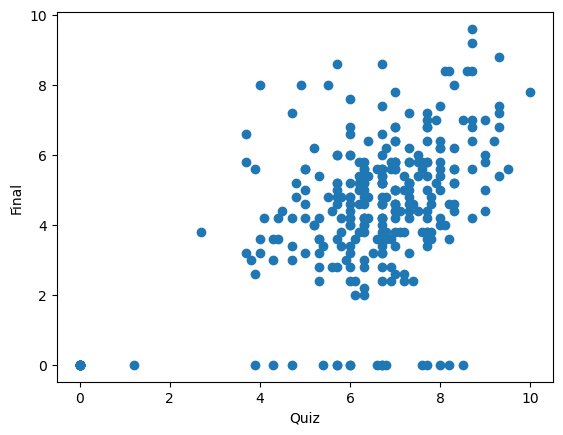

In [7]:
#draw a scatter plot to find the points that gain most between quiz and final_exam
x = df['Quiz']
y = df['Final']
plt.scatter(x, y)
plt.xlabel('Quiz')
plt.ylabel('Final')
plt.show()

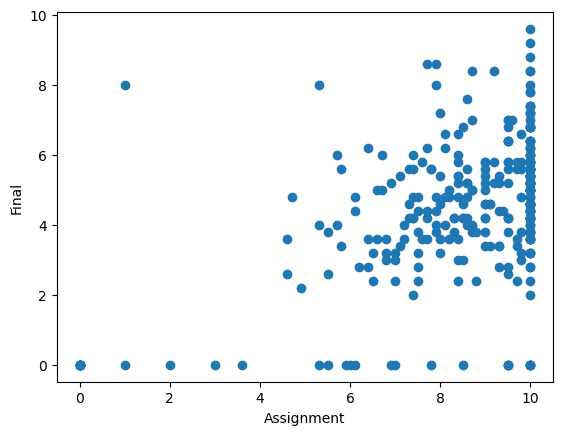

In [8]:
x1 = df['Assignment']
y1 = df['Final']
plt.scatter(x1, y1)
plt.xlabel('Assignment')
plt.ylabel('Final')
plt.show()

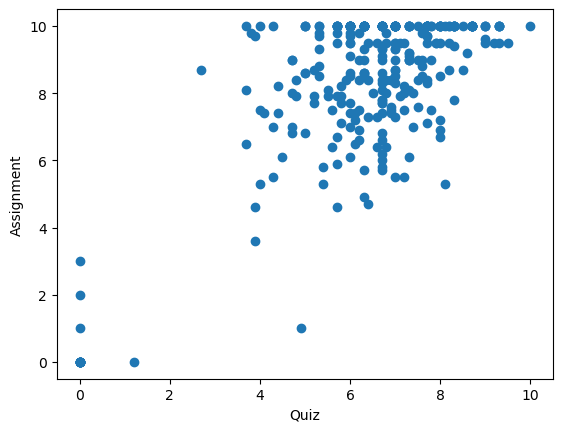

In [9]:
x2 = df['Quiz']
y2 = df['Assignment']
plt.scatter(x2, y2)
plt.xlabel('Quiz')
plt.ylabel('Assignment')
plt.show()

In [10]:
df.isnull().sum()

No.                 0
Computer_Project    0
Assignment          0
Quiz                0
Final               0
dtype: int64

<Axes: xlabel='Quiz', ylabel='Final'>

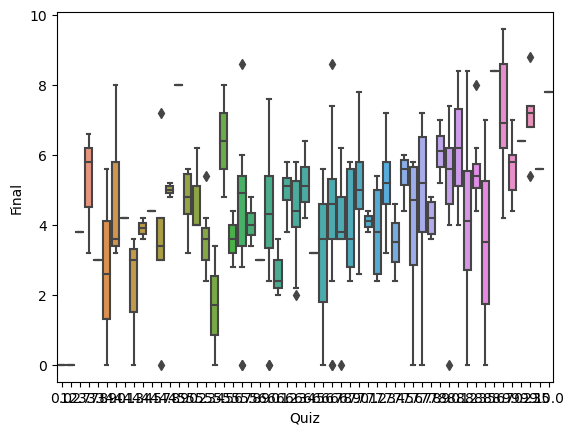

In [14]:
sns.boxplot(x='Quiz',y='Final',data=df)

C:\Users\User\AppData\Local\Temp\ipykernel_18132\1694977111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Final, bins=10)


<Axes: xlabel='Final', ylabel='Density'>

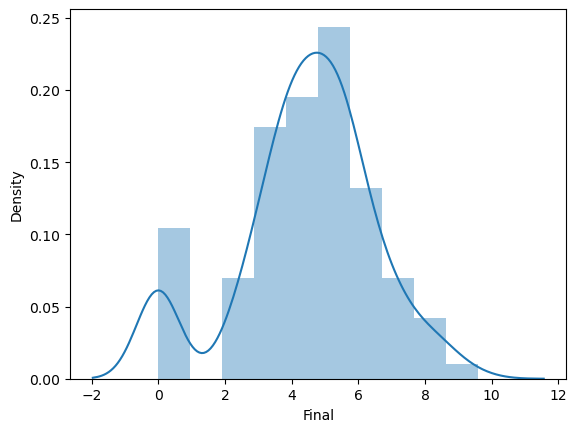

In [16]:
sns.distplot(df.Final, bins=10)

In [18]:
#Find the mean, varience and standard deviation of quiz, assignment and final exam of 30 random students.
import random
#Assignments
assignment_counts = df['Assignment'].value_counts()
assignment_grade = [random.choice(assignment_counts.index) for _ in range(30)]
print(assignment_grade)
#Quiz
quiz_counts = df['Quiz'].value_counts()
quiz_grade = [random.choice(quiz_counts.index) for _ in range(30)]
print(quiz_grade)
#Final exam
final_exam_counts = df['Final'].value_counts()
final_exam_grade = [random.choice(final_exam_counts.index) for _ in range(30)]
print(final_exam_grade)

[8.1, 8.2, 8.4, 0.0, 9.5, 9.6, 6.1, 7.0, 1.0, 9.8, 8.3, 6.4, 6.2, 9.3, 5.8, 9.3, 9.6, 5.3, 7.2, 8.4, 8.7, 7.0, 9.7, 7.4, 5.5, 8.7, 6.9, 5.3, 6.8, 9.7]
[7.9, 9.5, 8.0, 4.4, 5.7, 8.3, 5.0, 8.5, 3.8, 5.6, 8.1, 6.4, 5.0, 6.1, 10.0, 8.1, 5.0, 6.0, 6.0, 6.7, 4.3, 5.4, 6.3, 3.9, 5.2, 7.0, 5.2, 4.1, 9.2, 7.1]
[8.0, 2.2, 6.2, 6.2, 3.8, 2.8, 7.4, 6.2, 3.0, 7.0, 3.8, 9.2, 7.2, 7.8, 6.0, 5.8, 2.6, 4.4, 8.4, 3.6, 4.0, 6.2, 6.0, 9.6, 8.8, 4.6, 7.6, 8.4, 7.8, 6.0]


In [19]:
import statistics

In [20]:
#mean
quiz_mean = statistics.mean(quiz_grade)
assignment_mean = statistics.mean(assignment_grade)
final_exam_mean = statistics.mean(final_exam_grade)

In [21]:
#variance
quiz_variance = statistics.variance(quiz_grade)
assignment_variance = statistics.variance(assignment_grade)
final_exam_variance = statistics.variance(final_exam_grade)

In [22]:
#standard deviation
quiz_standard = statistics.stdev(quiz_grade)
assignment_standard = statistics.stdev(assignment_grade)
final_exam_standard = statistics.stdev(final_exam_grade)

In [23]:
# Print the results
print("Sample mean:")
print("Quiz grade:", quiz_mean)
print("Assignment grade:", assignment_mean)
print("Final exam grade:", final_exam_mean)

print("\nSample variance:")
print("Quiz grade:", quiz_variance)
print("Assignment grade:", assignment_variance)
print("Final exam grade:", final_exam_variance)

print("\nSample standard deviation:")
print("Quiz grade:", quiz_standard)
print("Assignment grade:", assignment_standard)
print("Final exam grade:", final_exam_standard)

Sample mean:
Quiz grade: 6.3933333333333335
Assignment grade: 7.306666666666667
Final exam grade: 6.02

Sample variance:
Quiz grade: 3.0337471264367815
Assignment grade: 5.535126436781609
Final exam grade: 4.461655172413793

Sample standard deviation:
Quiz grade: 1.7417655199356719
Assignment grade: 2.352684942099475
Final exam grade: 2.1122630452701183


In [25]:
import pandas as pd
import random

# Calculate the proportion of students with final exam grades more than 7 in the whole dataset
proportion_above_7 = (df['Final'] > 7).mean()

print(f"Proportion of students with final exam grades more than 7: {proportion_above_7:.2%}")

# Set your seed for reproducibility (replace 'your_seed' with your actual ID)
random.seed(10)

# Simulate selecting 30 students randomly
sample_size = 30
random_sample = random.sample(df['Final'].tolist(), sample_size)

# Calculate the expected number of students with final exam grades more than 7
expected_number_above_7 = proportion_above_7 * sample_size

print(f"Expected number of students with final exam grades more than 7 in a sample of 30: {expected_number_above_7:.2f}")

# Calculate the actual number of students with final exam grades more than 7 in your sample
actual_number_above_7 = sum(grade > 7 for grade in random_sample)

print(f"Actual number of students with final exam grades more than 7 in your sample: {actual_number_above_7}")

Proportion of students with final exam grades more than 7: 7.69%
Expected number of students with final exam grades more than 7 in a sample of 30: 2.31
Actual number of students with final exam grades more than 7 in your sample: 1


In [26]:
Z = 1.96
E = 1.2
n = (Z**2 * (final_exam_standard)**2) / E**2
print(n)

11.902704521072797


Training model part:

In [27]:
corr = df.corr()
corr.Final.sort_values(ascending=False)

Final               1.000000
Quiz                0.527050
Assignment          0.501811
Computer_Project    0.483916
No.                 0.199699
Name: Final, dtype: float64

<Axes: >

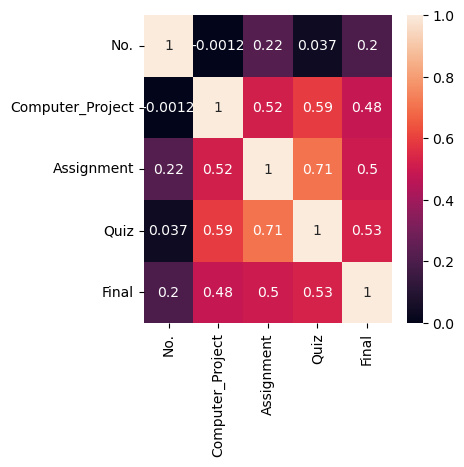

In [29]:
plt.figure(figsize=(4,4))
sns.heatmap(corr, annot=True)

In [30]:
x = df.drop(['Final'], axis=1)
y = df.Final
print(x)
print(y)

     No.  Computer_Project  Assignment  Quiz
0      1               2.5         8.4   4.8
1      2              10.0         9.2   7.3
2      3              10.0         7.7   5.2
3      4               6.5         7.4   4.1
4      5               1.0         6.4   5.6
..   ...               ...         ...   ...
294  295               4.0         7.3   7.0
295  296               5.0         9.1   7.3
296  297               1.0         9.3   5.3
297  298               9.0         9.8   6.0
298  299               1.0        10.0   6.0

[299 rows x 4 columns]
0      5.2
1      5.8
2      6.2
3      4.2
4      2.8
      ... 
294    4.6
295    4.6
296    2.8
297    6.6
298    4.8
Name: Final, Length: 299, dtype: float64


In [31]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=10)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((239, 4), (60, 4), (239,), (60,))

In [32]:
model_t = LinearRegression()
model_t.fit(Xtrain, Ytrain)
y_pred = model_t.predict(Xtest)

In [33]:
print(y_pred)

[ 1.80404325 -0.39609864  4.5050193   4.88875787  6.35573778  5.54926492
  5.59031425  3.90199311  3.74427174  5.5043416   5.22130393  5.34602632
  5.1640664   5.07175384  6.2504205   2.24308942  2.88463855  4.32371422
  4.65874405  3.7905091   4.62647755  4.82085044  5.77796878  5.2110515
  5.3951327   4.67333534  4.81553548  5.91178246  4.89412944  5.29652087
  4.23047617  4.39991756  4.51449951  5.17440364  4.61009367  4.58666502
  4.96398419  5.13696385  5.29349701  4.92767745  3.99315757  5.78437918
  5.09995479  6.21853072  6.18095663  4.74910017  5.10494713  4.68954442
  4.67030894  4.79675026  5.10737209  4.02329792 -0.10377564  4.11533574
  5.04395198  4.73408613  5.21561872  4.87738272  5.36973855  4.40758839]


In [38]:
print('Coefficient:',model_t.coef_)
print('Intercept:',model_t.intercept_)

Coefficient: [0.00265748 0.20981413 0.14432097 0.31357344]
Intercept: -0.568834963183904


In [39]:
#model evaluation
from sklearn import metrics
mse = metrics.mean_squared_error(Ytest, y_pred)
print(mse)

4.362220981216194


In [40]:
#root mean squared error:
rmse = np.sqrt(metrics.mean_squared_error(Ytest, y_pred))
print(rmse)

2.088593062618038


In [41]:
training_data_prediction = model_t.predict(Xtrain)
error_score = metrics.r2_score(Ytrain, training_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.44208247571353265
